In [ ]:
## NAME: JOHN UZODINMA
## Andreew ID: JUZODINM

In [1]:
import numpy as npy
import pandas as pnd
import matplotlib.pyplot as pyplt

Table 1: table showing λ, μ, ρ, W, T, Lq and utilization for Exponential distribution
   Lambda (λ)  Mu (μ)  Theoritical Utilization (ρ)  Average Waiting Time (W)  \
0        0.50     1.0                         0.50                  0.964364   
1        0.70     1.0                         0.70                  2.575320   
2        0.90     1.0                         0.90                  5.567183   
3        0.95     1.0                         0.95                 19.544772   

   Average System Time (T)  Time Average Queue Length (Lq)  \
0                 1.948638                        0.482182   
1                 3.568054                        1.802724   
2                 6.541343                        5.010464   
3                20.560187                       18.567534   

   Empirical Utilization  
0               0.483071  
1               0.698410  
2               0.857690  
3               0.978371  


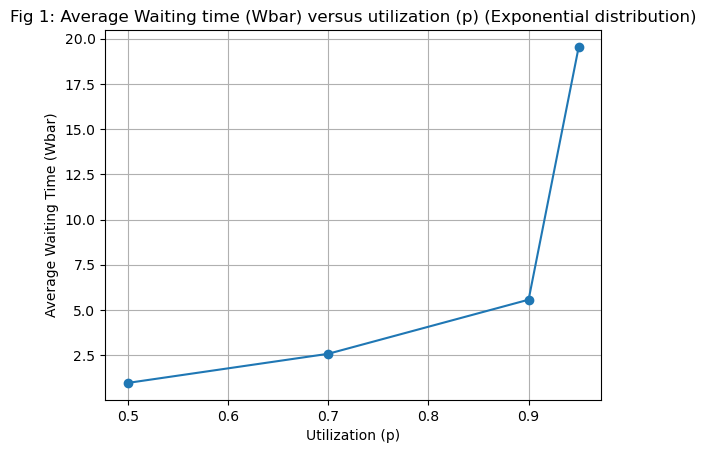

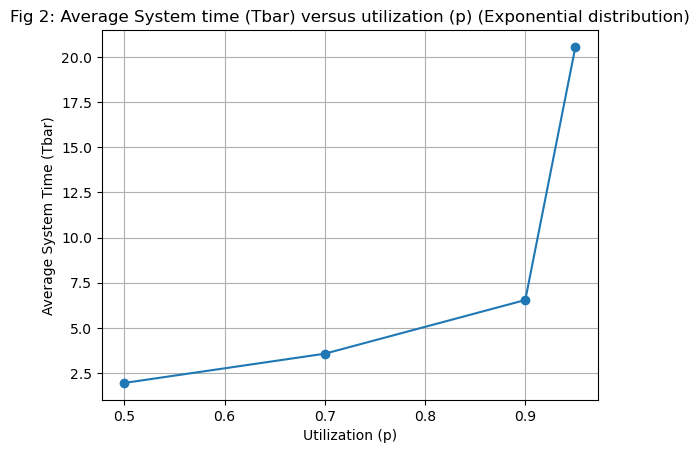

Table 1: table showing λ, μ, ρ, W, T, Lq and utilization for Uniform distribution
   Lambda (λ)  Mu (μ)  Theoritical Utilization (ρ)  Average Waiting Time (W)  \
0        0.50     1.0                         0.50                  0.628096   
1        0.70     1.0                         0.70                  1.074860   
2        0.90     1.0                         0.90                  4.695061   
3        0.95     1.0                         0.95                  5.959001   

   Average System Time (T)  Time Average Queue Length (Lq)  \
0                 1.637254                        0.314048   
1                 2.065722                        0.752402   
2                 5.684229                        4.225554   
3                 6.946551                        5.661051   

   Empirical Utilization  
0               0.513649  
1               0.687354  
2               0.871484  
3               0.930517  


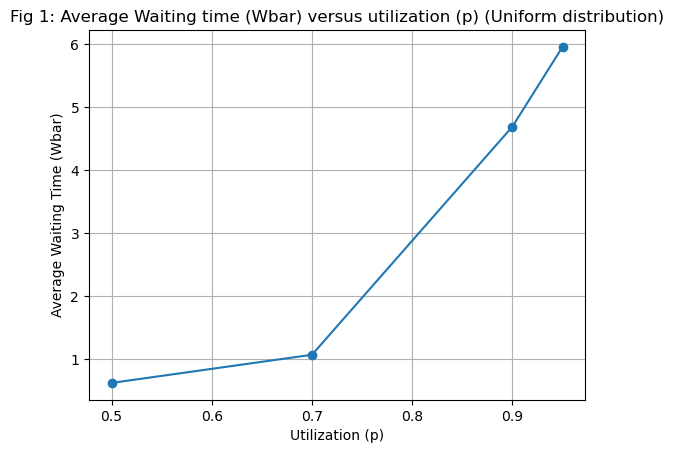

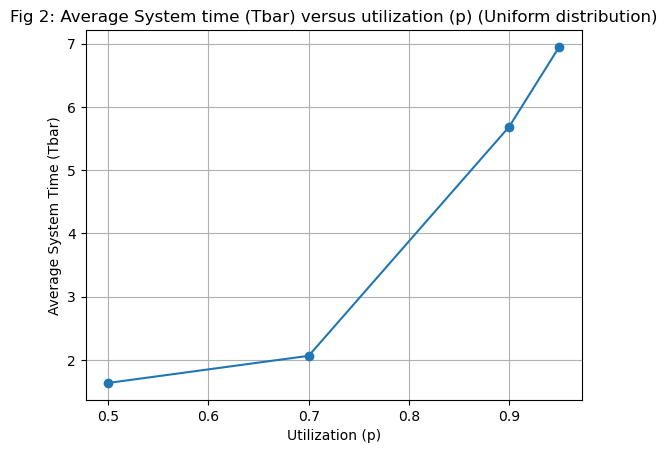

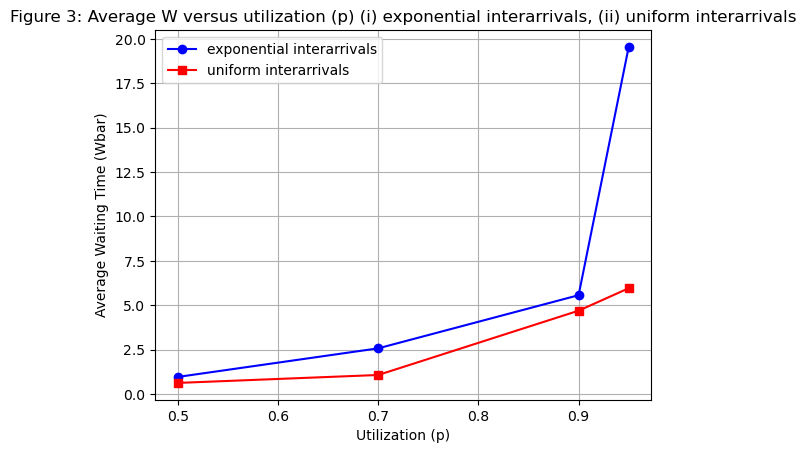

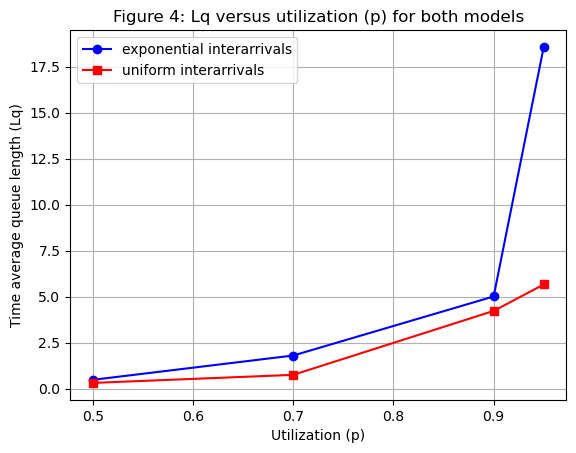

In [2]:
npy.random.seed(2025) # use a random seed of 2025

# STEP 1: Generate arrivals
def gen_poisson_arrivals(lamb, size):
        # i. Model a Poisson arrival process using independent and identically distributed exponential interarrival times with parameter lambda
        scale1 = 1/lamb # in munpy, scale (ꟕ = 1/lam)
        inter_arrival_times = npy.random.exponential(scale1, size)
        arrival_times = npy.cumsum(inter_arrival_times)
        return arrival_times

def gen_uniform_arrivals(lam, num):
        inter_arrival_times = npy.random.uniform(0, 2/lam, num)
        arrival_times = npy.cumsum(inter_arrival_times)
        return arrival_times

def gen_service_times(mu, size):
    scale = 1/mu
    service_times = npy.random.exponential(scale, size)
    return service_times


# STEP 3: Simulate the queue
def simulate_queue(arrivals, service_times, rate):
    size = len(arrivals)

    # i. Single server, FIFO. Let Di be the departure (service completion) time of job i.
    # ii. Recurrence: service_starti = max(Di−1,Ai), Di = service starti + Si.
    service_starts = npy.zeros(size) # initialize zeros(empty) array of service start times
    departures = npy.zeros(size) # initialize zeros(empty) array of service departure (completion) times

    # iii. Per-job metrics: waiting time Wi = service starti − Ai; system time Ti = Di − Ai.
    waiting_times = npy.zeros(size) # initialize zeros(empty) array of service waiting times
    system_times = npy.zeros(size) # initialize zeros(empty) array of system times

    for i in range(size):
        service_starts[i] = max(departures[i-1], arrivals[i])
        departures[i] = service_starts[i] + service_times[i]
        waiting_times[i] = service_starts[i] - arrivals[i]
        system_times[i] = departures[i] - arrivals[i]

    avg_waiting_time = npy.mean(waiting_times)
    avg_system_time = npy.mean(system_times)

    busy_time_of_server = npy.sum(service_times) # busy time of server is the sum of all service times

    simulation_horizon = departures[-1] - arrivals[0] # time at the last departure
    utilization = busy_time_of_server/simulation_horizon

    time_avg_queue_length = avg_waiting_time * rate

    return avg_waiting_time, avg_system_time, time_avg_queue_length, utilization


def perform_exp_experiment(parameters):
    avg_wait_times = []
    avg_sys_times = []
    emp_utils = []
    avg_que_lens = []

    for parameter in parameters:

        poisson_arrivals = gen_poisson_arrivals(parameter[0], 2000)
        exp_service_times = gen_service_times(parameter[1], 2000)
        avg_wait, avg_sys, avg_que_len, emp_util = simulate_queue(poisson_arrivals, exp_service_times, parameter[0])

        avg_wait_times.append(avg_wait)
        avg_sys_times.append(avg_sys)
        avg_que_lens.append(avg_que_len)
        emp_utils.append(emp_util)

    return avg_wait_times, avg_sys_times, avg_que_lens, emp_utils


def perform_uniform_experiment(parameters):
    avg_wait_times = []
    avg_sys_times = []
    avg_que_lens = []
    emp_utils = []

    for parameter in parameters:

        uniform_arrivals = gen_uniform_arrivals(parameter[0], 2000)
        exp_service_times = gen_service_times(parameter[1], 2000)
        avg_wait, avg_sys, avg_que_len, emp_util = simulate_queue(uniform_arrivals, exp_service_times, parameter[0])

        avg_wait_times.append(avg_wait)
        avg_sys_times.append(avg_sys)
        avg_que_lens.append(avg_que_len)
        emp_utils.append(emp_util)

    return avg_wait_times, avg_sys_times, avg_que_lens, emp_utils


def show_table(lambdas, means, theoretical_utils, avg_waiting_times, avg_system_times, avg_queue_lengths, emp_utlizations, distribution):

    # Table 1: a summary table with columns (λ, μ, ρ, W, T, Lq, utilization).
    print(f"Table 1: table showing λ, μ, ρ, W, T, Lq and utilization for {distribution} distribution")
    dt = {
        'Lambda (λ)': lambdas,
        'Mu (μ)': means,
        'Theoritical Utilization (ρ)': theoretical_utils,
        'Average Waiting Time (W)':  avg_waiting_times,
        'Average System Time (T)': avg_system_times,
        'Time Average Queue Length (Lq)': avg_queue_lengths,
        'Empirical Utilization': emp_utlizations
         }

    dataFrame = pnd.DataFrame(dt)
    print(dataFrame)
    # dataFrame.to_csv("simulation_table.csv")

    # iii. Figure 1: Plot Average W versus utilization (p)
    pyplt.title(f"Fig 1: Average Waiting time (Wbar) versus utilization (p) ({distribution} distribution)")
    pyplt.xlabel("Utilization (p)")
    pyplt.ylabel("Average Waiting Time (Wbar)")
    pyplt.plot(theoretical_utils, avg_waiting_times, marker='o')
    pyplt.grid(True)
    pyplt.show()

    # iii. Figure 2: Plot Average T versus utilization (p)
    pyplt.title(f"Fig 2: Average System time (Tbar) versus utilization (p) ({distribution} distribution)")
    pyplt.xlabel("Utilization (p)")
    pyplt.ylabel("Average System Time (Tbar)")
    pyplt.plot(theoretical_utils, avg_system_times, marker='o')
    pyplt.grid(True)
    pyplt.show()



def expo_experiment_grid():
    lambdas = []
    means = []
    theoretical_utils = [0.5, 0.7, 0.9, 0.95]
    parameter_list = {(0.5, 1.0), (0.7, 1.0), (0.9, 1.0), (0.95, 1.0)}
    avg_waiting_times, avg_system_times, avg_queue_lengths, emp_utlizations = perform_exp_experiment(parameter_list)

    for parameter in parameter_list:
        lambdas.append(parameter[0])
        means.append(parameter[1])

    show_table(lambdas, means, theoretical_utils, avg_waiting_times, avg_system_times, avg_queue_lengths, emp_utlizations, "Exponential")

    return avg_waiting_times, avg_system_times, avg_queue_lengths


def uniform_experiment_grid():
    lambdas = []
    means = []
    theoretical_utils = [0.5, 0.7, 0.9, 0.95]
    parameter_list = {(0.5, 1.0), (0.7, 1.0), (0.9, 1.0), (0.95, 1.0)}
    avg_waiting_times, avg_system_times, avg_queue_lengths, emp_utlizations = perform_uniform_experiment(parameter_list)

    for parameter in parameter_list:
        lambdas.append(parameter[0])
        means.append(parameter[1])

    show_table(lambdas, means, theoretical_utils, avg_waiting_times, avg_system_times, avg_queue_lengths, emp_utlizations, "Uniform")

    return avg_waiting_times, avg_system_times, avg_queue_lengths


def plot_both_graphs(theo_utils):
    exp_Wbar, exp_Tbar, exp_Lq = expo_experiment_grid()
    uni_Wbar, uniTbar, uni_Lq = uniform_experiment_grid()

    # Plot both on the same graph
    pyplt.plot(theo_utils, exp_Wbar, marker='o', label="exponential interarrivals", color='blue')
    pyplt.plot(theo_utils, uni_Wbar, marker='s', label="uniform interarrivals", color='red')

    pyplt.xlabel("Utilization (p)")
    pyplt.ylabel("Average Waiting Time (Wbar)")
    pyplt.title("Figure 3: Average W versus utilization (p) (i) exponential interarrivals, (ii) uniform interarrivals")
    pyplt.legend()
    pyplt.grid(True)
    pyplt.show()


    # Plot both on the same graph
    pyplt.plot(theo_utils, exp_Lq, marker='o', label="exponential interarrivals", color='blue')
    pyplt.plot(theo_utils, uni_Lq, marker='s', label="uniform interarrivals", color='red')

    pyplt.xlabel("Utilization (p)")
    pyplt.ylabel("Time average queue length (Lq)")
    pyplt.title("Figure 4: Lq versus utilization (p) for both models")
    pyplt.legend()
    pyplt.grid(True)
    pyplt.show()



theoretical_utils = [0.5, 0.7, 0.9, 0.95]
plot_both_graphs(theoretical_utils)



## Short discussion

### Explain how reduced arrival variability affects waiting/queue lengths and why the wrong assumption can mislead system design near high utilization.

From Fig 3 and 4 above, we see that reducing arrival variability (with uniform interarrival times) led to smaller average waiting times and smaller average queue lengths which can be seen as the red line in the Figures above which took values between 0.5 and 6.

Meanwhile, increasing arrival variability (with exponential interarrival times) led to higher waiting times as well as higher queue lengths represented by the blue line in the Fig above which took values from 0.5 to as high as 20

Therefore, we see that assuming exponential interarrival times led to longer waiting times even as the system was at high utilization, but maintained lesser values for uniform interarrivals. This tells us that the system will not be efficient for a Poission arrival process, as it uses up resources but does not reflect on its efficiency which is the waiting time or queue length in this context